In [1]:
import pandas as pd

# Load the uploaded CSV file to inspect its contents
file_path = 'car.csv'
car_data = pd.read_csv(file_path)

# Display the first few rows and general information about the dataset
car_data.head(), car_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


(  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
 0     ritz  2014           3.35           5.59       27000    Petrol   
 1      sx4  2013           4.75           9.54       43000    Diesel   
 2     ciaz  2017           7.25           9.85        6900    Petrol   
 3  wagon r  2011           2.85           4.15        5200    Petrol   
 4    swift  2014           4.60           6.87       42450    Diesel   
 
   Seller_Type Transmission  Owner  
 0      Dealer       Manual      0  
 1      Dealer       Manual      0  
 2      Dealer       Manual      0  
 3      Dealer       Manual      0  
 4      Dealer       Manual      0  ,
 None)

In [2]:
from datetime import datetime

# Data Preprocessing

# Add a new feature 'Years_Used'
current_year = datetime.now().year
car_data['Years_Used'] = current_year - car_data['Year']

# Drop irrelevant columns (e.g., 'Car_Name', as it has high cardinality and less predictive value)
car_data = car_data.drop(['Car_Name', 'Year'], axis=1)

# Verify preprocessing steps
car_data.head()


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Used
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


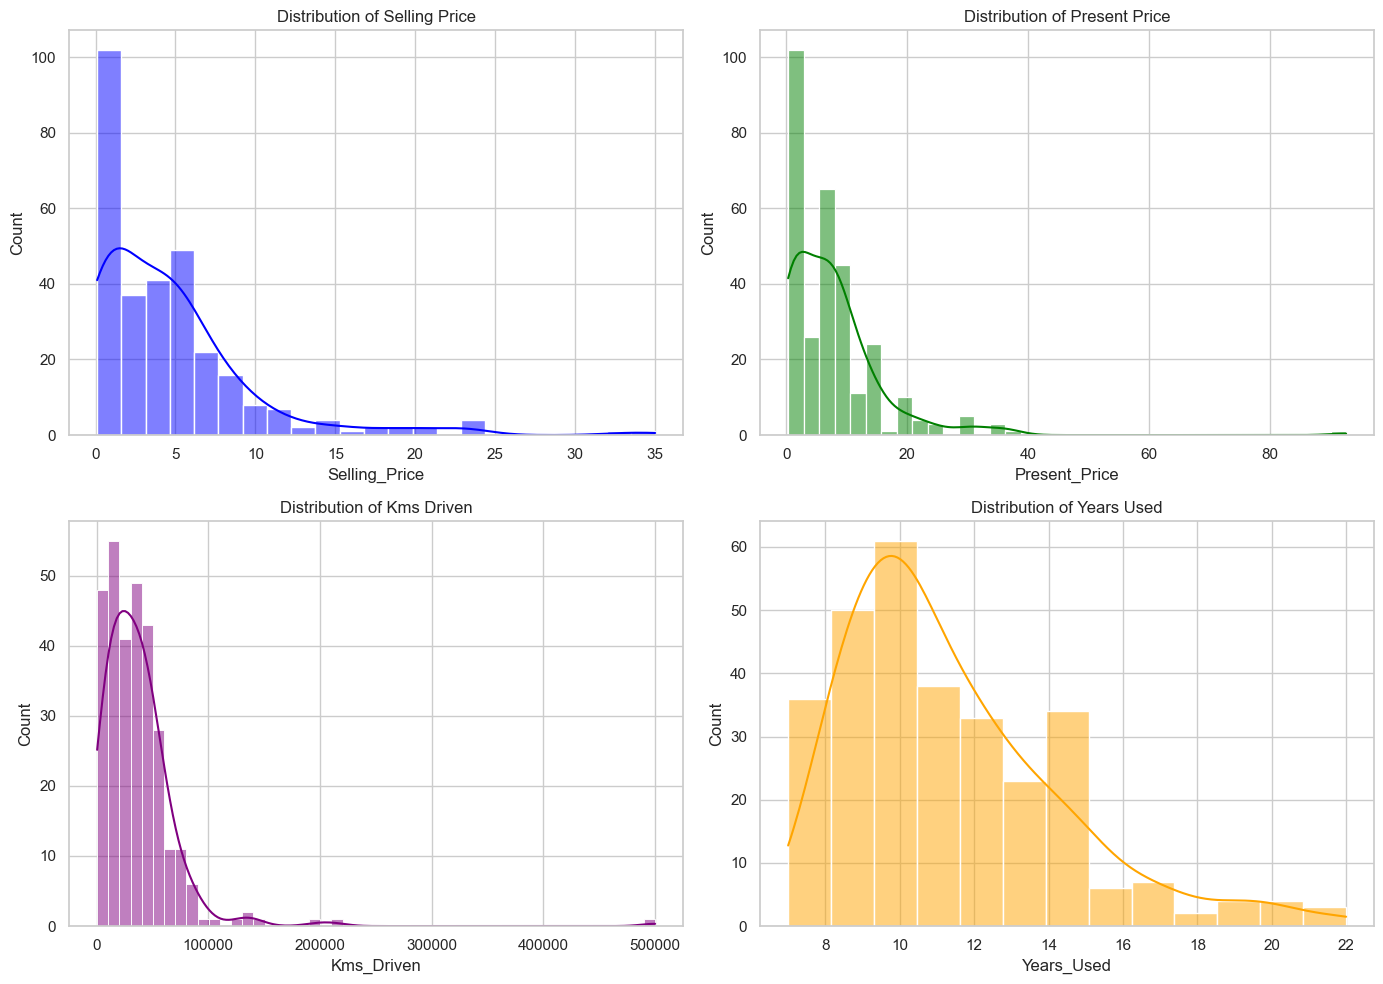

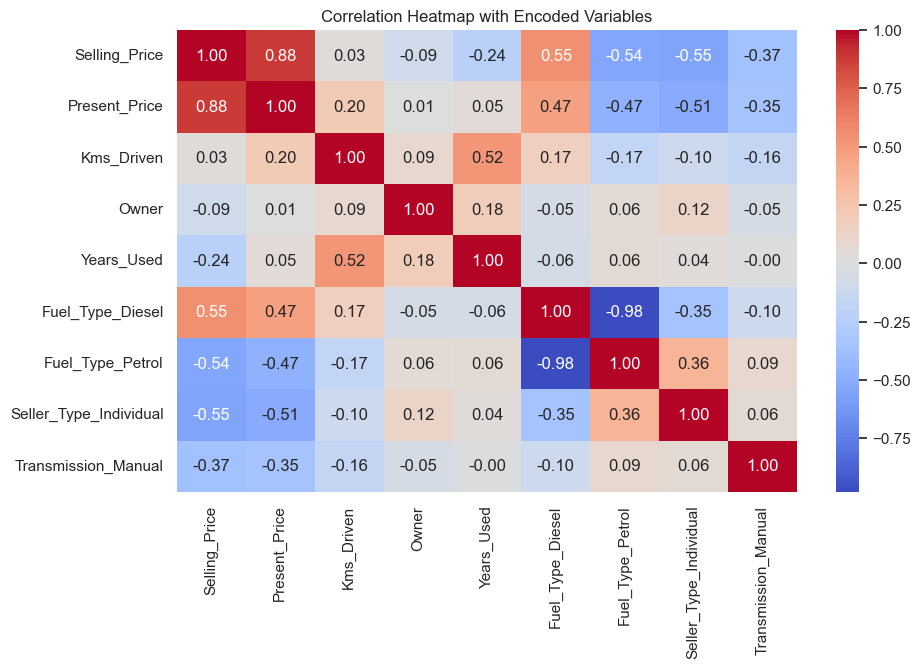

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set(style="whitegrid")

# Plot distributions of numerical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Distribution of Selling Price
sns.histplot(car_data['Selling_Price'], kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Distribution of Selling Price")

# Distribution of Present Price
sns.histplot(car_data['Present_Price'], kde=True, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Distribution of Present Price")

# Distribution of Kms_Driven
sns.histplot(car_data['Kms_Driven'], kde=True, ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Distribution of Kms Driven")

# Distribution of Years Used
sns.histplot(car_data['Years_Used'], kde=True, ax=axes[1, 1], color="orange")
axes[1, 1].set_title("Distribution of Years Used")

plt.tight_layout()
plt.show()

# Encode categorical variables using one-hot encoding
car_data_encoded = pd.get_dummies(car_data, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

# Correlation heatmap with encoded features
plt.figure(figsize=(10, 6))
sns.heatmap(car_data_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap with Encoded Variables")
plt.show()



In [4]:
# Encoding categorical variables using one-hot encoding
encoded_data = pd.get_dummies(car_data, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

# Display the updated dataset with encoded features
encoded_data.head()


,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Used,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,11,False,True,False,True
1,4.75,9.54,43000,0,12,True,False,False,True
2,7.25,9.85,6900,0,8,False,True,False,True
3,2.85,4.15,5200,0,14,False,True,False,True
4,4.60,6.87,42450,0,11,True,False,False,True
